# Effect of Bike Users Characteristics on Their Trip Durations
## by Dilek Dervishogullari

## Investigation Overview

> In this investigation, I wanted to look at the characteristics of bike users that could be used to predict their trip durations. The main focus was on four attributes: season of the year, user gender and user type. 

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in 2018. The trip duration variable's unit had to be changed from seconds to minutes due to unreasonable unit of measure.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
rides = pd.read_csv('rides_clean.csv', index_col=0)

## Distribution of Trip Duration

> Trip duration in the dataset take on a very large range of values, from about 1 minutes at the lowest, to about 1400 minutes at the highest. Plotted on a logarithmic scale, the distribution of diamond prices takes on a unimodal shape, with a peak at around 10 minutes.

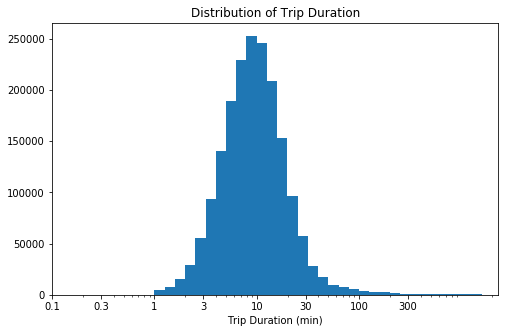

In [3]:
# trip duration distribution in log scale
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(rides['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = rides, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (min)')
plt.title('Distribution of Trip Duration')
plt.show();

## Distribution of Season

> Summer season has the largest numbers of trips, while winter has the lowest numbers. This might be due to colder temperature and increasing rainfalls in Winter months (December to February)

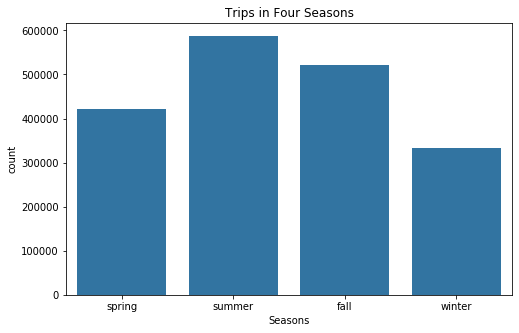

In [4]:
# convert season column in order
level_order = ['spring', 'summer', 'fall', 'winter']
ordered_season = pd.api.types.CategoricalDtype(ordered = True, categories=level_order)
rides['season'] = rides['season'].astype(ordered_season)

# plot distribution of season
plt.figure(figsize=[8, 5])

base_color = sb.color_palette()[0]
sb.countplot(data = rides, x = 'season', color = base_color)
plt.title('Trips in Four Seasons')
plt.xlabel('Seasons')

plt.show()

## Trip Duration in Four Seasons

> Summer has the longest trip duration , with average above 14 mins. However, surprisingly, Fall has the lowest trip duration, even lower than Winter, even though Fall season usually has the best weather in SF. After checking the weather data in Fall 2018, I remembered about the Wildfires in Northern California that happened in Nov 2018 which caused low air quality in SF, thus this might cause a decrease in users' GoBike trip duration. 

> Other than that, there is no significant difference of trip duration in between the four seasons. It is probably because the weather in San Francisco bay area does not fluctuate to the extremes (snow or heat wave).

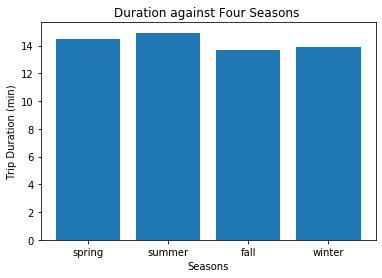

In [5]:
# check the trip duration over each season
spring_dur = rides.query("season == 'spring'").duration_min.mean ()
summer_dur = rides.query("season == 'summer'").duration_min.mean()
fall_dur = rides.query("season == 'fall'").duration_min.mean()
winter_dur = rides.query("season == 'winter'").duration_min.mean()

plt.bar(['spring','summer','fall','winter'],[spring_dur , summer_dur , fall_dur , winter_dur] )
plt.title('Duration against Four Seasons ')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration (min)');

## Trip Duration for Different User Types

> Subscriber users tend to ride the bikes in lesser duration than customer users. This might be because the subscriber users ride the bikes for regular commutes (work, school, etc.), but the customer users might be tourists that use the bikes for traveling around town.

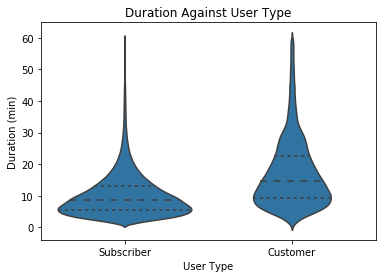

In [6]:
# query the data for duration only below 1 hour to focus the data
rides_dur = rides.query("duration_min < 60")

# plot relationship between user type and duration
base_color = sb.color_palette()[0]
sb.violinplot(data=rides_dur, x='user_type', y='duration_min', color=base_color, inner='quartile')
plt.xlabel('User Type')
plt.ylabel('Duration (min)')
plt.title('Duration Against User Type');

## Trip Duration Across Gender and User Type

> In all gender types, the "customer" user type has the longer trip duration. 

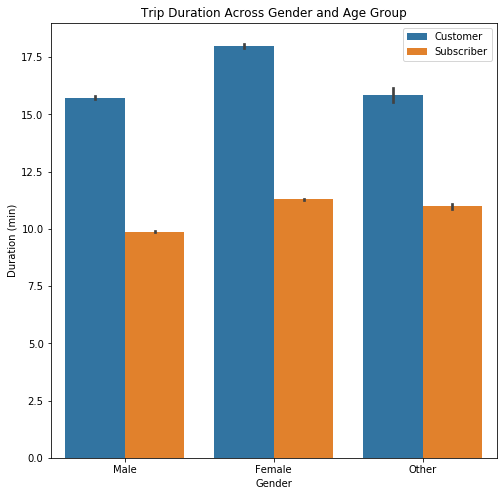

In [9]:


# create bar plot on gender versus duration on levels of the age bins variable
plt.figure(figsize = [8, 8])

ax = sb.barplot(x='member_gender', y = 'duration_min', hue='user_type', data=rides_dur.sort_values(by= 'user_type'))
plt.title('Trip Duration Across Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
leg = ax.legend()